In [1]:
from datetime import datetime
import pandas as pd
import numpy as np

import importlib
from cryptoz import utils
importlib.reload(utils)
from cryptoz import stats
importlib.reload(stats)

/Users/olegpolakow/miniconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


<module 'cryptoz.stats' from '/Users/olegpolakow/Documents/SourceTree/cryptoz/cryptoz/stats.py'>

In [2]:
df = pd.DataFrame({'a': [0, 1, 2, 3, 4, 5], 'b': [5, 4, 3, 2, 1, 0], 'c': [0, 10, 100, 1000, 10000, 100000]}, index=[
    datetime(2018, 1, 1, 1, 1, 1),
    datetime(2018, 1, 1, 1, 1, 2),
    datetime(2018, 1, 1, 1, 1, 3),
    datetime(2018, 1, 1, 1, 2, 1),
    datetime(2018, 1, 1, 1, 2, 2),
    datetime(2018, 1, 1, 1, 2, 3)
])
df

,a,b,c
2018-01-01 01:01:01,0,5,0
2018-01-01 01:01:02,1,4,10
2018-01-01 01:01:03,2,3,100
2018-01-01 01:02:01,3,2,1000
2018-01-01 01:02:02,4,1,10000
2018-01-01 01:02:03,5,0,100000


## Correlation

In [3]:
stats.rolling_corr(df, 'c', window=3)

,a,b,c
2018-01-01 01:01:01,NaN,NaN,NaN
2018-01-01 01:01:02,NaN,NaN,NaN
2018-01-01 01:01:03,0.907841,-0.907841,1.0
2018-01-01 01:02:01,0.904194,-0.904194,1.0
2018-01-01 01:02:02,0.904194,-0.904194,1.0
2018-01-01 01:02:03,0.904194,-0.904194,1.0


In [4]:
stats.rolling_corr(df, 'c', backwards=True, window=3)

,a,b,c
2018-01-01 01:01:01,0.907841,-0.907841,1.0
2018-01-01 01:01:02,0.904194,-0.904194,1.0
2018-01-01 01:01:03,0.904194,-0.904194,1.0
2018-01-01 01:02:01,0.904194,-0.904194,1.0
2018-01-01 01:02:02,NaN,NaN,NaN
2018-01-01 01:02:03,NaN,NaN,NaN


In [5]:
stats.expanding_corr(df, 'c')

,a,b,c
2018-01-01 01:01:01,NaN,NaN,NaN
2018-01-01 01:01:02,1.000000,-1.000000,1.0
2018-01-01 01:01:03,0.907841,-0.907841,1.0
2018-01-01 01:02:01,0.824616,-0.824616,1.0
2018-01-01 01:02:02,0.759771,-0.759771,1.0
2018-01-01 01:02:03,0.707487,-0.707487,1.0


In [6]:
stats.expanding_corr(df, 'c', backwards=True)

,a,b,c
2018-01-01 01:01:01,0.707487,-0.707487,1.0
2018-01-01 01:01:02,0.759721,-0.759721,1.0
2018-01-01 01:01:03,0.824141,-0.824141,1.0
2018-01-01 01:02:01,0.904194,-0.904194,1.0
2018-01-01 01:02:02,1.000000,-1.000000,1.0
2018-01-01 01:02:03,NaN,NaN,NaN


In [7]:
stats.resampling_corr(df, 'c', pd.Timedelta(minutes=1))

,a,b,c
1.0,0.907841,-0.907841,1.0
2.0,0.904194,-0.904194,1.0


## Percentiles

In [8]:
stats.percentiles(df, 0, 100, 10)

,a,b,c
0,0.0,0.0,0.0
10,0.5,0.5,5.0
20,1.0,1.0,10.0
30,1.5,1.5,55.0
40,2.0,2.0,100.0
50,2.5,2.5,550.0
60,3.0,3.0,1000.0
70,3.5,3.5,5500.0
80,4.0,4.0,10000.0
90,4.5,4.5,55000.0


## Max drawdown

In [9]:
df = pd.DataFrame({'a': [1, 2, 3, 2, 1], 'b': [3, 2, 1, 2, 3]}, index=[
    datetime(2018, 1, 1, 1, 1, 1),
    datetime(2018, 1, 1, 1, 1, 2),
    datetime(2018, 1, 1, 1, 1, 3),
    datetime(2018, 1, 1, 1, 1, 4),
    datetime(2018, 1, 1, 1, 1, 5)
])

In [10]:
df.loc[datetime(2018, 1, 1, 1, 1, 1):datetime(2018, 1, 1, 1, 1, 5)]

,a,b
2018-01-01 01:01:01,1,3
2018-01-01 01:01:02,2,2
2018-01-01 01:01:03,3,1
2018-01-01 01:01:04,2,2
2018-01-01 01:01:05,1,3


In [11]:
stats.mdd(df)

,a,b
2018-01-01 01:01:01,0.000000,0.000000
2018-01-01 01:01:02,0.000000,0.333333
2018-01-01 01:01:03,0.000000,0.666667
2018-01-01 01:01:04,0.333333,0.333333
2018-01-01 01:01:05,0.666667,0.000000


In [12]:
stats.rolling_mdd(df, window=3)

,a,b
2018-01-01 01:01:01,NaN,NaN
2018-01-01 01:01:02,NaN,NaN
2018-01-01 01:01:03,0.000000,0.666667
2018-01-01 01:01:04,0.333333,0.000000
2018-01-01 01:01:05,0.666667,0.000000


In [13]:
stats.resampling_mdd(df, pd.Timedelta(minutes=1))

,a,b
2018-01-01 01:01:01,0.000000,0.000000
2018-01-01 01:01:02,0.000000,0.333333
2018-01-01 01:01:03,0.000000,0.666667
2018-01-01 01:01:04,0.333333,0.333333
2018-01-01 01:01:05,0.666667,0.000000


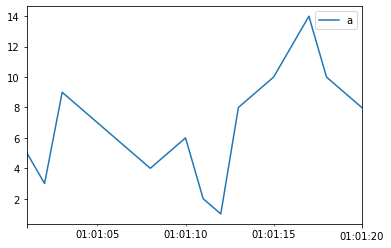

In [14]:
df = pd.DataFrame({'a': [5, 3, 9, 8, 7, 6, 5, 4, 5, 6, 2, 1, 8, 9, 10, 12, 14, 10, 9, 8]}, index=[
    datetime(2018, 1, 1, 1, 1, 1),
    datetime(2018, 1, 1, 1, 1, 2),
    datetime(2018, 1, 1, 1, 1, 3),
    datetime(2018, 1, 1, 1, 1, 4),
    datetime(2018, 1, 1, 1, 1, 5),
    datetime(2018, 1, 1, 1, 1, 6),
    datetime(2018, 1, 1, 1, 1, 7),
    datetime(2018, 1, 1, 1, 1, 8),
    datetime(2018, 1, 1, 1, 1, 9),
    datetime(2018, 1, 1, 1, 1, 10),
    datetime(2018, 1, 1, 1, 1, 11),
    datetime(2018, 1, 1, 1, 1, 12),
    datetime(2018, 1, 1, 1, 1, 13),
    datetime(2018, 1, 1, 1, 1, 14),
    datetime(2018, 1, 1, 1, 1, 15),
    datetime(2018, 1, 1, 1, 1, 16),
    datetime(2018, 1, 1, 1, 1, 17),
    datetime(2018, 1, 1, 1, 1, 18),
    datetime(2018, 1, 1, 1, 1, 19),
    datetime(2018, 1, 1, 1, 1, 20)
])
df.plot()

In [15]:
stats.dd_info(df)

{'a':                 start              valley                 end dd_duration  \
 0 2018-01-01 01:01:01 2018-01-01 01:01:02 2018-01-01 01:01:03    00:00:01   
 1 2018-01-01 01:01:03 2018-01-01 01:01:12 2018-01-01 01:01:14    00:00:09   
 2 2018-01-01 01:01:17 2018-01-01 01:01:20                 NaT    00:00:03   
 
   rec_duration  dd_rate (%)  rec_rate (%)  
 0     00:00:01    40.000000         200.0  
 1     00:00:02    88.888889         800.0  
 2     00:00:00    42.857143           NaN  }

In [16]:
# Get drawdown
mapper = lambda sr, begin_idx, end_idx: 1 - sr.loc[begin_idx:end_idx].min() / sr.loc[begin_idx]
# Get maximum drawdown
reducer = lambda lst: '%.2f%%'%(np.max(lst)*100)
stats.dd_stats(df, mapper, reducer)

a    88.89%
dtype: object